In [1]:
library(tidytext)
library(stringr)
library(tidyverse)
library(tibble)
library(ggplot2)
library(lubridate)
library(SnowballC)
library(RSQLite)

Warning message:
“package ‘tidytext’ was built under R version 3.5.1”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ readr   1.1.1
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.0     ✔ dplyr   0.7.4
✔ ggplot2 2.2.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date

Warning message:
“package ‘SnowballC’ was built under R version 3.5.1”

In [2]:
system('head -n 1 ../../data/eth_1aug15_1aug18/0_sorted.csv', intern = TRUE)

[1] "1024444451639451653,1024444451639451653,2276587183,coinspectator,0,2018-07-31 19:59,Shopin Continues to Make Blockchain History: Partners with Qryptos; Sweeps Aw... #bitcoin #ethereum #eth https://coinspectator.com/news/684586/shopin-continues-to-make-blockchain-history-partners-with-qryptos-sweeps-awards-increases …pic.twitter.com/NINqbvGrqD,0,0,0,,#bitcoin #ethereum #eth,/coinspectator/status/1024444451639451653,https://coinspectator.com/news/684586/shopin-continues-to-make-blockchain-history-partners-with-qryptos-sweeps-awards-increases,0,0,0,,,,,"

In [3]:
system('tail -n 1 ../../data/eth_1aug15_1aug18/0_sorted.csv', intern = TRUE)

[1] "Tweet ID, Conversation ID, Author Id , Author Name, isVerified, DateTime, Tweet Text, Replies, Retweets, Favorites, Mentions, Hashtags, Permalink, URLs, isPartOfConversation, isReply, isRetweet, Reply To User ID, Reply To User Name, Quoted Tweet ID, Quoted Tweet User Name, Quoted Tweet User ID"

In [4]:
con = dbConnect(SQLite(), dbname="../../data/twitter.db")

In [5]:
tweets_df = dbGetQuery(con, 'select * from eth where DateTime > "2018-03-03" and DateTime < "2018-05-03" ')

In [6]:
#tweets_df <- read.csv('../../data/eth_1aug15_1aug18/0_sorted.csv', nrow=1484777)
head(tweets_df)

TweetID,ConversationID,AuthorId,AuthorName,isVerified,DateTime,TweetText,Replies,Retweets,Favorites,⋯,Permalink,URLs,isPartOfConversation,isReply,isRetweet,ReplyToUserID,ReplyToUserName,QuotedTweetID,QuotedTweetUserName,QuotedTweetUserID
991870791074631681,991870791074631681,945265237997080576,ItsEricBass,0,2018-05-02 22:43,RT _JohnWhelan: Delighted to have been a co-chair of the EEA's Technical Steering Committee that has been behind this effort. A big thanks to all involved. https://www.coindesk.com/enterprise-ethereum-alliance-isnt-dead-got-roadmap-prove/ … EntEthAlliance #ethereum #crypto #cryptocurrency,0,0,0,⋯,/ItsEricBass/status/991870791074631681,https://www.coindesk.com/enterprise-ethereum-alliance-isnt-dead-got-roadmap-prove/,0,0,0,,,,,
991870790789484544,991870790789484544,4548834813,coinmarketbot,0,2018-05-02 22:43,EEA launches the first enterprise Ethereum [ETH] architecture stack https://ambcrypto.com/eea-launches-the-first-enterprise-ethereum-eth-architecture-stack/ … #ethereum $ ETH #crypto #blockchain #coinmarketbot,0,0,0,⋯,/coinmarketbot/status/991870790789484544,https://ambcrypto.com/eea-launches-the-first-enterprise-ethereum-eth-architecture-stack/,0,0,0,,,,,
991870711646990336,991870711646990336,948166344532377600,RaqDBlock,0,2018-05-02 22:43,#Bitcoin #Ethereum #Hydro @HydrogenAPI The Big 3 of cryptospace no hyping just being real. Real blockchain application for the world!,0,0,1,⋯,/RaqDBlock/status/991870711646990336,,0,0,0,,,,,
991870706899021824,991870706899021824,2725988761,grockrecords2,0,2018-05-02 22:42,Cryptocurrency CFD Trading Sparks Plus500’s 280% Revenue Spike Click http://bit.ly/2w9KI52 #ripple #cryptocurrency #coinbase #bitcoin #icos #blockchain #eth #ethereum #btc #cryptocurrencynews #binance #ico #crypto #cryptocurrencies #tokensale #cryptonews #altcoinspic.twitter.com/2CEf67rYhF,1,1,1,⋯,/grockrecords2/status/991870706899021824,http://bit.ly/2w9KI52,0,0,0,,,,,
991870678935658498,991870678935658498,771502019471220736,CryptoNewswire,0,2018-05-02 22:42,ETH/BTC 1.5 Month High - Ethereum (ETH) price reaches 1.5 Month High - $ ETH $ BTC #ethereum #cryptocurrencies #altcoins,0,1,1,⋯,/CryptoNewswire/status/991870678935658498,,0,0,0,,,,,
991870568432578560,991870568432578560,959186180351946753,EthereumWest,0,2018-05-02 22:42,Boom $700 #eth,0,0,0,⋯,/EthereumWest/status/991870568432578560,,0,0,0,,,,,


In [7]:
remove_reg <- "&amp;|&lt;|&gt;"
unnest_reg  <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"

tidy_tweets <- tweets_df %>% 

filter(!str_detect(TweetText, "^RT")) %>%
mutate(text = str_remove_all(TweetText, remove_reg)) %>%

unnest_tokens(word, text, token = "tweets") %>%
mutate(word=wordStem(word, language = 'english')) %>%

filter(!word %in% stop_words$word,
     !word %in% str_remove_all(stop_words$word, "'"),
     str_detect(word, "[a-z]"))

In [8]:
tidy_tweets$DateTime <- tidy_tweets$DateTime %>% as.Date(format = '%Y-%m-%d')
str(tidy_tweets)

'data.frame':	21499364 obs. of  23 variables:
 $ TweetID             : chr  "991870790789484544" "991870790789484544" "991870790789484544" "991870790789484544" ...
 $ ConversationID      : chr  "991870790789484544" "991870790789484544" "991870790789484544" "991870790789484544" ...
 $ AuthorId            : chr  "4548834813" "4548834813" "4548834813" "4548834813" ...
 $ AuthorName          : chr  "coinmarketbot" "coinmarketbot" "coinmarketbot" "coinmarketbot" ...
 $ isVerified          : chr  "0" "0" "0" "0" ...
 $ DateTime            : Date, format: "2018-05-02" "2018-05-02" ...
 $ TweetText           : chr  "EEA launches the first enterprise Ethereum [ETH] architecture stack https://ambcrypto.com/eea-launches-the-firs"| __truncated__ "EEA launches the first enterprise Ethereum [ETH] architecture stack https://ambcrypto.com/eea-launches-the-firs"| __truncated__ "EEA launches the first enterprise Ethereum [ETH] architecture stack https://ambcrypto.com/eea-launches-the-firs"| __truncated_

In [9]:
summary(tidy_tweets$DateTime)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2018-03-03" "2018-03-17" "2018-03-31" "2018-03-31" "2018-04-17" "2018-05-02"

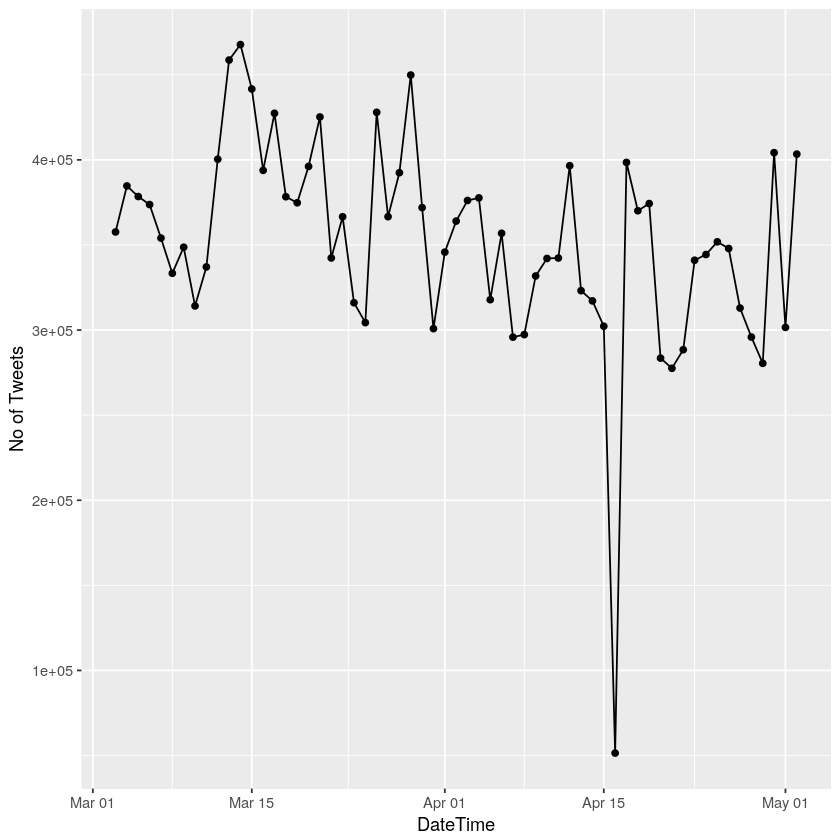

In [10]:
tidy_tweets %>% count(DateTime) %>% 
ggplot() + aes(x=DateTime, y=n) + geom_line() +geom_point() + ylab('No of Tweets')


Calculate frequency of words against each month

In [11]:
tidy_tweets_freq <- tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% count(word, sort=TRUE) %>% 
left_join(tidy_tweets %>% mutate(week = week(DateTime)) %>% group_by(week) %>% summarize(total=n())) %>% 
mutate(freq = n/total) %>% mutate(logn = round(log(n))) %>% select(week, word, freq, n, logn, total)
tidy_tweets_orig <- tidy_tweets_freq

Joining, by = "week"


In [12]:
n=50
tidy_tweets_freq <- tidy_tweets_orig %>% arrange(desc(n))  %>% group_by(week) %>% top_n(freq, n=n) 
tidy_tweets_freq %>% arrange(week)

week,word,freq,n,logn,total
9,#ethereum,0.039225512,29118,10,742323
9,#eth,0.033369571,24771,10,742323
9,#btc,0.028740858,21335,10,742323
9,#bitcoin,0.028646560,21265,10,742323
9,#ico,0.023175895,17204,10,742323
9,#blockchain,0.022731345,16874,10,742323
9,#cryptocurr,0.022020064,16346,10,742323
9,#crypto,0.021630746,16057,10,742323
9,#xrp,0.013048228,9686,9,742323
9,#rippl,0.011876232,8816,9,742323


Let's convert words to columns (dimensions)

In [13]:
tidy_tweets_plot <- tidy_tweets_freq %>% select(-n,-total, -logn) %>% spread(week, freq, fill = 0)
tidy_tweets_ca <- tidy_tweets_freq %>% select(-n, -freq,-total) %>% spread(week, logn, fill = 0)

In [14]:
saveRDS(tidy_tweets_ca, file = paste0('../../data/tidy_tweets_per_week_log_eth_',n,'.rds'))
tidy_tweets_ca

word,9,10,11,12,13,14,15,16,17,18
#ada,8,9,10,9,9,8,8,9,9,8
#airdrop,9,10,11,10,11,10,10,10,10,9
#altcoin,9,10,10,10,10,10,10,10,10,9
#bch,7,9,0,0,9,8,0,8,9,8
#binanc,8,9,9,9,9,9,9,8,9,8
#bitcoin,10,11,11,11,11,11,11,11,11,10
#bitcoincash,0,0,0,0,0,0,0,9,9,8
#blockchain,10,11,11,11,11,11,11,11,11,10
#bounti,8,10,10,10,10,9,10,9,9,8
#btc,10,11,11,11,11,11,11,11,11,10


In [15]:
#saveRDS(tidy_tweets_plot, file = paste0('../../data/tidy_tweets_per_week_log_eth_',n,'.rds'))
tidy_tweets_plot

word,9,10,11,12,13,14,15,16,17,18
#ada,0.006613024,0.003286277,0.007443768,0.003300305,0.002979908,0.002007800,0.001893177,0.002918935,0.002489373,0.002726336
#airdrop,0.011858719,0.010697923,0.017695501,0.013914736,0.013778450,0.009932112,0.009950749,0.008525385,0.009713480,0.009405138
#altcoin,0.007075087,0.006151572,0.006928941,0.007552492,0.009321957,0.006609811,0.006852630,0.007647160,0.006579561,0.006502095
#bch,0.002257777,0.002267642,0.000000000,0.000000000,0.002198120,0.002031692,0.000000000,0.002120949,0.002994986,0.003170808
#binanc,0.002828957,0.002822255,0.001946438,0.002494928,0.002000037,0.002258460,0.002917675,0.002252561,0.003756483,0.003221296
#bitcoin,0.028646560,0.030589796,0.029207348,0.031720942,0.033270808,0.033729360,0.033288753,0.037125177,0.032586521,0.032365322
#bitcoincash,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.002589173,0.003096109,0.004139090
#blockchain,0.022731345,0.026084436,0.025977211,0.030210760,0.032754135,0.030695445,0.031646499,0.030350370,0.030955371,0.030620791
#bounti,0.005858636,0.005492431,0.007762840,0.007277302,0.009006380,0.005298663,0.006739269,0.006087883,0.005367849,0.004429394
#btc,0.028740858,0.025934818,0.028833020,0.024611922,0.025067305,0.023071674,0.024177387,0.023898966,0.024264136,0.022816835


Selecting by 18


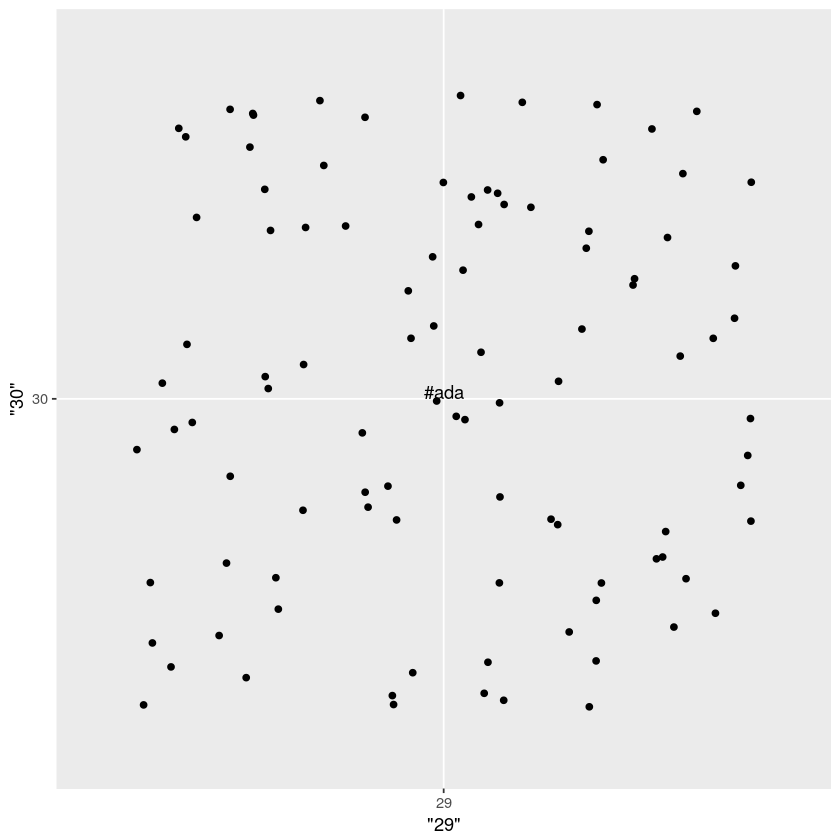

In [16]:
tidy_tweets_plot %>% top_n(n = 1000) %>% ggplot() + aes('29','30') + geom_jitter() + geom_text(aes(label = word), check_overlap = TRUE, vjust = 0)